Eric's note. SLAC Specific instruction
https://confluence.slac.stanford.edu/pages/viewpage.action?pageId=245696522

More general, complete note provided by DM
https://nb.lsst.io/science-pipelines/science-pipelines-in-notebooks.html

download EO utilities
```
$ mkdir src
$ cd src/
$ git clone https://github.com/lsst-camera-dh/EO-utilities.git
$ git clone https://github.com/lsst-camera-dh/datacat-utilities.git
$ wget https://files.pythonhosted.org/packages/57/76/7b745031b9c67e4e7a8aa760a599976347efee9cd0c775051808f50f6d3c/datacat-0.5.tar.gz
$ tar xvzf datacat-0.5.tar.gz
```

edit ~/notebooks/.user_setups
add
```
export PYTHONPATH="~/src/EO-utilities/python":${PYTHONPATH}
export PYTHONPATH="~/src/datacat-utilities/python":${PYTHONPATH}
export PYTHONPATH="~/src/datacat-0.5":${PYTHONPATH}
```
before the below line so that it won't miss the above lines
```
source /gpfs/slac/lsst/fs3/g/data/software/jh_install/prod/setup.sh
```

In [1]:
from lsst import afw
afw.version.__version__

'19.0.0'

In [2]:
from lsst.daf.persistence import Butler
from lsst.eotest.sensor import MaskedCCD, makeAmplifierGeometry

from exploreRun import exploreRun
from lsst.eo_utils.base.image_utils import get_ccd_from_id,\
    get_amp_list, get_data_as_read, sort_sflats

from lsst.eo_utils.base.data_access import get_data_for_run

import lsst.eotest.image_utils as imutil

# Set the path to the Butler repository and import a Butler
repo_path = "/gpfs/slac/lsst/fs3/g/data/datasets/ts8"
butler = Butler(repo_path)

# Get a dataId for the first bias frame for a FE55 run
incompleteDataId = dict(run='6006D', imageType='BIAS', testType='FE55', detectorName='S00')
ss = butler.subset('raw', '', incompleteDataId)
dataId = ss.cache[0]

# Specify the corresponding file
fname = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-010-Dev/6006D/fe55_raft_acq/v0/40509/S00/E2V-CCD250-266-Dev_fe55_bias_000_6006D_20180724054018.fits'

# Get the data using the Butler, and using MaskedCCD
exp = get_ccd_from_id(butler, ss.cache[0], [])
ccd = get_ccd_from_id(None, fname, [])

# Get the list of amplifier indexes, 
# Note that this number starts at 0 in butler and and 1 in MaskedCCD
amps_det = get_amp_list(exp)
amps_ccd = get_amp_list(ccd)

# Get the data for amp 3
# This function will return the data as arrays in the readout order,
# which is what we generally want for EO testing
ff_det = get_data_as_read(exp, amps_det[3], ['imaging'])
ff_ccd = get_data_as_read(ccd, amps_ccd[3], ['imaging'])

# Get the imaging data
image_data_det = ff_det['imaging']
image_data_ccd = ff_ccd['imaging']

# Take the mean of the imaging region
mean_det = image_data_det.mean()
mean_ccd = image_data_ccd.mean()

print("Compare means: %.2F %.2F" % (mean_det, mean_ccd))

Unable to determine dark time. Setting from exposure time.


Compare means: 27252.05 27252.05


In [3]:
print(exp.getMetadata())

SIMPLE = 1
// Java FITS: Tue Jul 03 17:30:46 PDT 2018
BITPIX = 8
// bits per data value
NAXIS = 0
// number of axes
EXTEND = 1
// Extensions are permitted
DATE = "2018-07-24T05:40:22.350"
// Creation Date and Time of File
MJD = 58323.236369791
// Modified Julian Date that the file was written
IMAGETAG = "1532410818239"
// Image tag (CCS/VST)
TSTAND = "TS8"
// Which Test stand at the site was used
CONTNUM = "000018ee2f06"
// CCD Controller Serial Number
SEQFILE = "seq-e2v-2s-invert.seq"
// Name of Sequencer File
CCD_MANU = "E2V"
// CCD Manufacturer
CCD_TYPE = "CCD250"
// CCD Model Number
CCD_SERN = "16193-09-04"
// Manufacturers? CCD Serial Number
REBNAME = "R00.Reb0"
// Name of the REB
TESTTYPE = "FE55"
// DARK:FLAT:OBS:PPUMP:QE:SFLAT
SEQNUM = 0
// Sequence number extracted from the original filename
DETSIZE = "[1:4096,1:4004]"
TEMP_SET = -100.00000000000
// Temperature set point (deg C)
CCDTEMP = -98.750126826300
// Measured temperature (deg C)
MONOWL = 550.02900000000
// Monochromato

# Butler Basics
https://github.com/LSSTScienceCollaborations/StackClub/blob/master/Basics/ButlerTutorial.ipynb

## get list of images for superflat
https://github.com/lsst-camera-dh/EO-utilities/blob/e50ab44cbe6d1a33e85ae23170c1b193c15ee904/python/lsst/eo_utils/base/image_utils.py#L1056

In [9]:
get_data_for_run(None,run_id='6006D',testtypes=["QE"])

{'RTM-010': {'S00': {None: []},
  'S01': {None: []},
  'S02': {None: []},
  'S10': {None: []},
  'S11': {None: []},
  'S12': {None: []},
  'S20': {None: []},
  'S21': {None: []},
  'S22': {None: []}}}

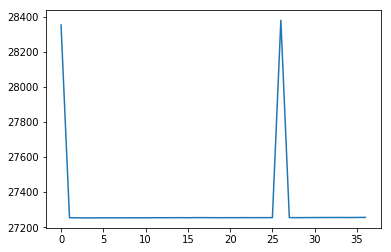

In [184]:
pylab.plot([ x["mean"] for x in selected ] )

In [210]:
for anid in selected:
    tmp = anid
    print(tmp)
    del tmp["mean"]
    print(tmp)    
    exp = get_ccd_from_id(butler, tmp, [])
    aseg = get_data_as_read(exp, amps_det[3], ['imaging'])
    mean = aseg["imaging"].mean()


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240854044, 'raftName': 'RTM-010', 'detector': 63, 'mean': 28352.06}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240854044, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240854103, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.229}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240854103, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240854389, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27253.924}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240854389, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240855056, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27253.277}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240855056, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240855337, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27253.67}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240855337, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240856044, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.082}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240856044, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240856332, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.096}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240856332, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240857023, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27253.9}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240857023, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240857303, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.188}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240857303, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240857589, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.146}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240857589, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240858260, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.123}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240858260, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240858536, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.414}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240858536, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240859205, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.37}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240859205, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240859472, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.488}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240859472, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240900142, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.824}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240900142, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240900408, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.33}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240900408, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240901084, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.01}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240901084, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240901377, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.967}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240901377, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240902067, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.627}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240902067, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240902337, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.525}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240902337, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240903014, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.607}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240903014, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240903285, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.717}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240903285, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240903556, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.982}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240903556, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240904238, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.654}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240904238, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240904504, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.947}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240904504, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240905179, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.967}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240905179, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240905592, 'raftName': 'RTM-010', 'detector': 63, 'mean': 28378.986}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240905592, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240906059, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.307}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240906059, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240909084, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27254.66}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240909084, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240912105, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.168}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240912105, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240915128, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.38}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240915128, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240918163, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.568}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240918163, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240921188, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.586}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240921188, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240924210, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.902}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240924210, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240927231, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.447}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240927231, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240930255, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27255.898}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240930255, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240933276, 'raftName': 'RTM-010', 'detector': 63, 'mean': 27256.2}
{'run': '6006D', 'testType': 'SFLAT', 'detectorName': 'S00', 'visit': 201807240933276, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


https://lsst-camera.slac.stanford.edu/DataPortal/SummaryReport.jsp?run=6006D

In [101]:
# Get a dataId for the first bias frame for a FE55 run
incompleteDataId = dict(run='6006D', imageType='FLAT', testType='FLAT', detectorName='S00')
ss = butler.subset('raw', '', incompleteDataId)
dataId = ss.cache[1]
print(dataId)
exp = get_ccd_from_id(butler, ss.cache[0], [])
amps_det = get_amp_list(exp)
print(amps_det)

{'run': '6006D', 'imageType': 'FLAT', 'testType': 'FLAT', 'detectorName': 'S00', 'visit': 201807240710485, 'raftName': 'RTM-010', 'detector': 63}


Unable to determine dark time. Setting from exposure time.


range(0, 16)


In [102]:
import pylab
%matplotlib inline
import scipy.stats 
from astropy.stats import mad_std

In [127]:
def show(exp,amps_det):
    fig, axs = pylab.subplots(2,8,figsize=(5,5),dpi=300)
    for i, amp in enumerate(amps_det):
        ff_det = get_data_as_read(exp, amp, ['imaging'])
        mean = ff_det["imaging"].mean()
        std = mad_std(ff_det["imaging"])
        N = 3
        row = int(i/8)
        col = i%8    
        ax = axs[row][col]
        print(i,row,col, mean, std )
#        ax.set_title("amp{:d}".format(i))
        if row==1:
            origin="lower"
        else:
            origin=None
        ax.imshow(ff_det["imaging"],origin=origin,vmin=mean-N*std,vmax=mean+N*std)
        ax.set_xticks([])
        ax.set_yticks([])
#    pylab.tight_layout()
    pylab.show()


Unable to determine dark time. Setting from exposure time.


0 0 0 206362.97 876.2179111368108
1 0 1 207642.95 692.3752360421162
2 0 2 205864.62 779.8487669339466
3 0 3 207003.05 816.9138223965867
4 0 4 206339.67 821.3616290521036
5 0 5 206505.5 833.2224468001483
6 0 6 206446.73 830.2572423631372
7 0 7 206081.25 842.118060111182
8 1 0 208586.66 889.5613311033612
9 1 1 209014.44 849.53107120371
10 1 2 209740.62 846.5658667666987
11 1 3 209413.2 744.2663136898123
12 1 4 208713.52 699.7882471346442
13 1 5 209645.05 776.8835624969355
14 1 6 207884.16 896.9743421958892
15 1 7 208305.84 944.4176131880685


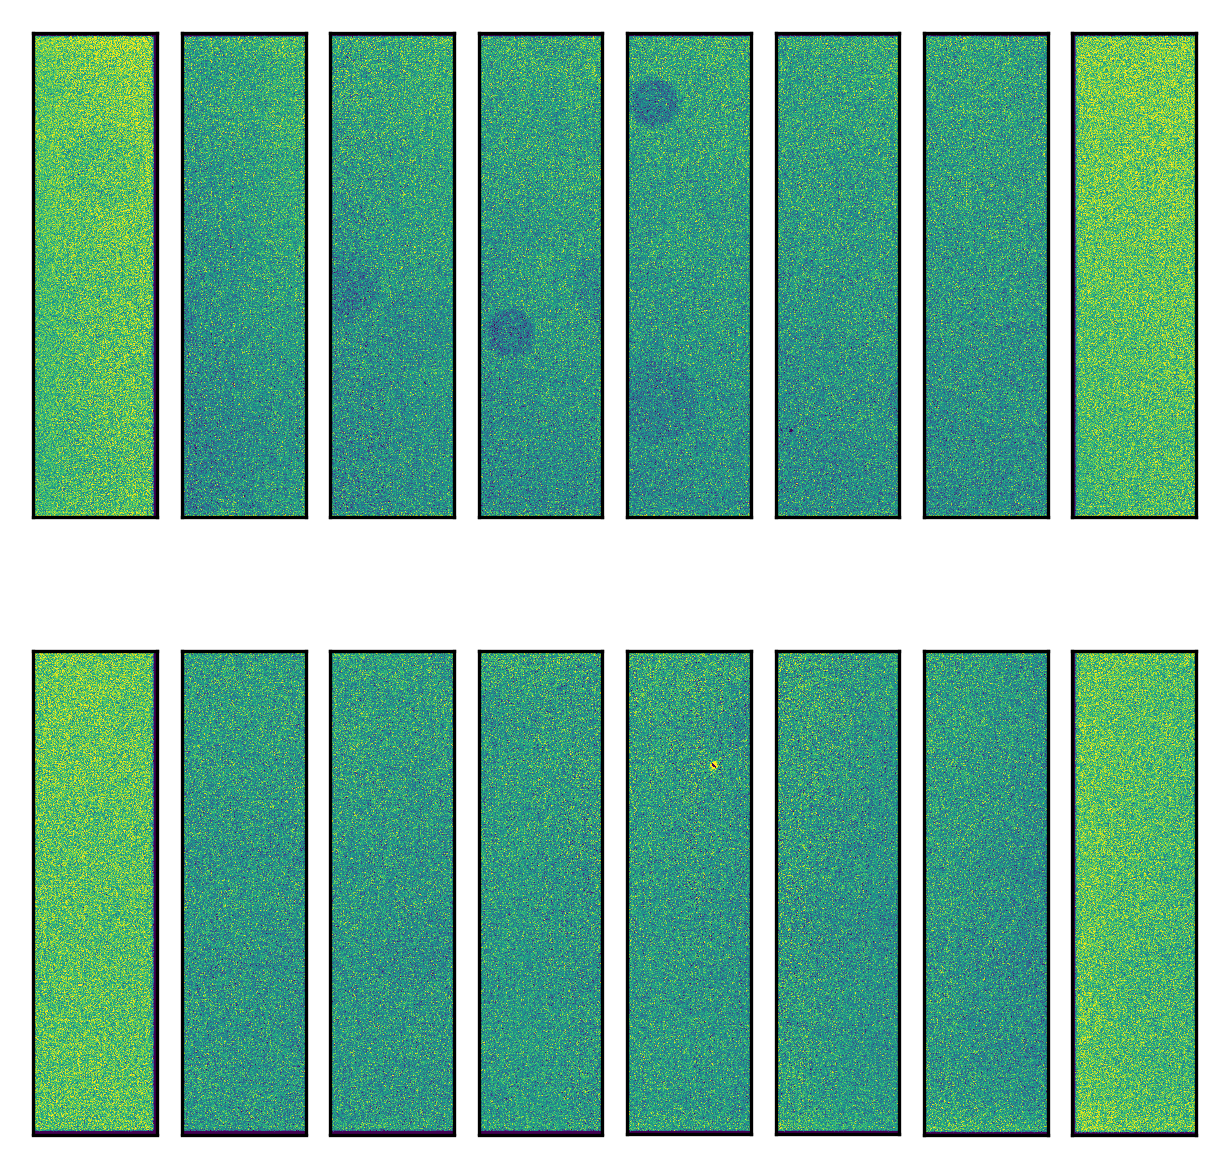

In [129]:
for im in ss.cache[70:71]:
    exp = get_ccd_from_id(butler, im, [])
    amps_det = get_amp_list(exp)
    show(exp,amps_det)

In [209]:
from lsst.eo_utils import EOUtils
eo = EOUtils()
data = eo.get_summary_data_run('EOResultsSummary', 'eo_results_sum', '6106D', ['GAIN', 'PTC_GAIN'], dataset='ts8')


FileNotFoundError: [Errno 2] No such file or directory: 'analysis/bot/tables/summary/eotest/ts8_eotest_results_sum.fits'